In [1]:
%load_ext autoreload
%autoreload 2
import LayoutBox as lb
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
def plot_children(ax, box, level=0):
    '''
    Simple plotting to show where boxes are
    '''
    import matplotlib.patches as patches
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    # print(level)
    for child in box.children:
        rect = child.get_rect()
        print(child.name, child.get_rect())
        ax.add_patch(
            patches.Rectangle(
                (child.left.value(), child.bottom.value()),   # (x,y)
                child.width.value(),          # width
                child.height.value(),          # height
                fc = 'none',
                ec = colors[level]
            )
        )
        if level%2 == 0:
            ax.text(child.left.value(), child.bottom.value(), child.name,
                   size=12-level, color=colors[level])
        else:
            ax.text(child.right.value(), child.top.value(), child.name, 
                    ha='right', va='top', size=12-level, color=colors[level])
        
        plot_children(ax, child, level=level+1)


/Users/jklymak/matplotlib/lib/matplotlib/style/core.py:197: UserWarning: In /Users/jklymak/.matplotlib/stylelib/ggplotjmk.mplstyle: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(message)


## Some random layouts

top (0.2, 0.755, 0.6000000000000001, 0.245)
topl (0.19999980926513672, 0.755000114440918, 0.1999988555908203, 0.24499893188476562)
topm (0.39999961853027344, 0.755000114440918, 0.1999988555908203, 0.24499893188476562)
topr (0.5999994277954102, 0.755000114440918, 0.1999988555908203, 0.24499893188476562)
middle (0.1, 0.255, 0.7999999999999999, 0.49)
bottom (0.0, 0.0, 1.0, 0.245)


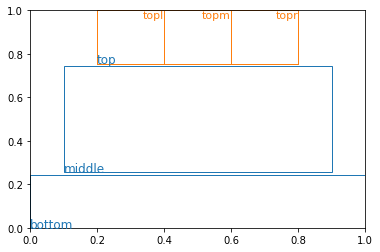

In [2]:
fig = lb.LayoutBox(parent=None, name='fig', tight=True)
fig.set_geometry(0,0,1.,1.)

top = lb.LayoutBox(parent=fig, name='top')
middle = lb.LayoutBox(parent=fig, name='middle')
bottom = lb.LayoutBox(parent=fig, name='bottom')

# stack these with height ratios 1, 2, 1
lb.vstackeq([top, middle, bottom], 
            height_ratios=[1.,2.,1.], padding = 0.01)

#middle.set_height(0.2)

#middle.set_bottom(0.3)

middle.set_left(0.1)
top.set_left_margin(0.2)
top.set_right_margin(0.2)

lb.align([top,middle],'h_center')

topl = lb.LayoutBox(parent=top, name='topl')
topm = lb.LayoutBox(parent=top, name='topm')
topr = lb.LayoutBox(parent=top, name='topr')

lb.hstackeq([topl,topm,topr])

bottom.update_variables()


f,ax = plt.subplots()
plot_children(ax, fig)

## Potential subplot layout

So a major goal of this is to be able to figure out the difference between the spine of an axis (`ax.get_position`) and it's bounding box (`ax.get_tight_bbox`) and then change the position of the spines so there is room inside the gridspec for the bbox.  

Here we call `set_bottom_margin_min` for a few of the axes, but use different values.  Then we call `lb.match_margins` on a list of axes, and they all have the same margins with the margin size set by the largest margin needed by the list of axes.  


sp1 (0.0, 0.0, 0.25, 1.0)
ax1 (0.03999999999999997, 0.03999999999999997, 0.19, 0.9099999999999999)
sp2 (0.25, 0.4117647058823529, 0.5, 0.5882352941176471)
ax2 (0.29, 0.4517647058823529, 0.44, 0.49823434044333076)
sp3 (0.75, 0.4117647058823529, 0.25, 0.5882352941176471)
ax3 (0.7899999999999999, 0.4517647058823529, 0.19000000000000006, 0.49823434044333065)
sp4 (0.25, 0.0, 0.5, 0.4117647058823529)
ax4 (0.29, 0.03999999999999997, 0.44, 0.32176470588235295)
sp5 (0.75, 0.0, 0.25, 0.4117647058823529)
ax5 (0.7899999999999999, 0.03999999999999997, 0.19000000000000006, 0.3217647058823529)
(0.7899999999999999, 0.03999999999999997, 0.19000000000000006, 0.3217647058823529)
LayoutBox: ax5, (left: 0.79) (bot: 0.04) (right: 0.98) (top: 0.36)


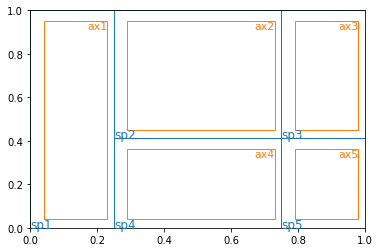

In [3]:
import matplotlib.gridspec as gridspec
nrows = 2
ncols = 3
gs = gridspec.GridSpec(nrows, ncols, height_ratios=[1.,0.7], width_ratios=[1.,2.,1.])

# we will *not* use the gs to make the subplots
#fig,ax = plt.subplots()

figL = lb.LayoutBox(parent=None, name='fig', tight=True)
figL.set_geometry(0,0,1.,1.)

sp1 = figL.layout_from_gridspec(gs[:,0], name='sp1')
sp2 = figL.layout_from_gridspec(gs[0,1], name='sp2')
sp3 = figL.layout_from_gridspec(gs[0,2], name='sp3')
sp4 = figL.layout_from_gridspec(gs[1,1], name='sp4')
sp5 = figL.layout_from_gridspec(gs[1,2], name='sp5')

ax1 = lb.LayoutBox(parent=sp1, name='ax1')
ax1.set_bottom_margin_min(0.01)
ax1.set_left_margin_min(0.01)
ax1.update_variables()

ax2 = lb.LayoutBox(parent=sp2, name='ax2')
ax2.set_bottom_margin_min(0.04)
ax2.set_left_margin_min(0.04)

ax3 = lb.LayoutBox(parent=sp3, name='ax3')
ax4 = lb.LayoutBox(parent=sp4, name='ax4')
ax4.set_top_margin(0.05)
ax5 = lb.LayoutBox(parent=sp5, name='ax5')

ax5.set_right_margin(0.02)

lb.match_margins([ax1,ax2, ax3, ax4, ax5])

#lb.match_bottom_margins([ax1, ax2, ax3, ax4, ax5])


ax2.update_variables()



fig, ax = plt.subplots()
plot_children(ax, figL)
print(ax5.get_rect())
print(ax5.__repr__())

## example of using layout to constrain axes to match

despite different sized and located axes.

We will do this backwards using the existing layout as a guide.

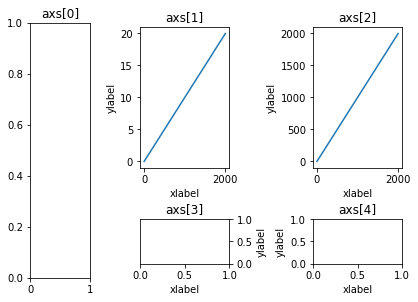

In [4]:
fig = plt.figure()
nrows = 2
ncols = 3
gs = gridspec.GridSpec(nrows, ncols, height_ratios=[1.,0.5], width_ratios=[0.5,1.,1.])

axs = []
axs += [fig.add_subplot(gs[:,0])]
axs[0].set_title('axs[0]')
n = 0
for i in range(2):
    for j in range(2):
        n += 1
        axs += [fig.add_subplot(gs[i,j+1])]
        axs[-1].set_title('axs[%d]'%n)
        axs[-1].set_xlabel('xlabel')
        axs[-1].set_ylabel('ylabel')

axs[1].plot(np.arange(2000),np.arange(2000)/100.)
axs[2].plot(np.arange(2000))


axs[3].yaxis.set_ticks_position('right')
axs[3].yaxis.set_label_position("right")
# OK, now fix.  Note fig.tight_layout will fix as well.
# fig.tight_layout()
def constrained_layout(fig, axs=None, leftpad=0, bottompad=0,
                      rightpad=0, toppad=0, pad=None):

    if axs == None:
        axs = fig.get_axes()    
    if isinstance(axs,list):
        pass
    else:
        axs = [axs]
    if pad != None:
        leftpad = pad
        righttpad = pad
        toppad = pad
        bottompad = pad
        
        
    figlb = lb.LayoutBox(parent=None, name='figlb')
    
    axlbs = []
    spinelbs = []

    renderer = fig.canvas.get_renderer()
    for n,ax in enumerate(axs):
        ss=ax.get_subplotspec()
        axlb = figlb.layout_from_gridspec(ss, name='axlb%d'%n)
 
        # OK, we have already pre-plotted the axes, so we know their positions and their bbox
        pos = ax.get_position()
        invTransFig = fig.transFigure.inverted().transform_bbox
        bbox = invTransFig(ax.get_tightbbox(renderer=renderer))

        spinelb = lb.LayoutBox(parent=axlb, name='spinelb%d'%n)
        spinelb.set_left_margin_min(-bbox.x0+pos.x0+leftpad)
        spinelb.set_right_margin_min(bbox.x1-pos.x1+rightpad)
        spinelb.set_bottom_margin_min(-bbox.y0+pos.y0+bottompad)
        spinelb.set_top_margin_min(bbox.y1-pos.y1+toppad)

        axlbs += [axlb]
        spinelbs += [spinelb]

 
    # make all the margins match
    lb.match_margins(spinelbs)
    # run the solver
    figlb.update_variables()

    # OK, this should give us the new positions that will fit the axes...

    for spinelb,ax in zip(spinelbs,axs):
        ax.set_position(spinelb.get_rect())

# by calling this multiple times, only the axes in the list are matched wrt their margins
constrained_layout(fig,axs[0])
constrained_layout(fig,axs[1:], toppad=0.015)

#constrained_layout(fig,axs[1:3], rightpad=0.01, leftpad=0.01)
#constrained_layout(fig,axs[3], toppad=0.01, leftpad=0.02)
#constrained_layout(fig,axs[-1],pad=0.05)

### as before, but even more options to constrained_layout

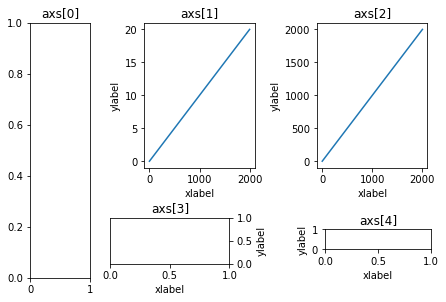

In [5]:
fig = plt.figure()
nrows = 2
ncols = 3
gs = gridspec.GridSpec(nrows, ncols, height_ratios=[1.,0.5], width_ratios=[0.5,1.,1.])

axs = []
axs += [fig.add_subplot(gs[:,0])]
axs[0].set_title('axs[0]')
n = 0
for i in range(2):
    for j in range(2):
        n += 1
        axs += [fig.add_subplot(gs[i,j+1])]
        axs[-1].set_title('axs[%d]'%n)
        axs[-1].set_xlabel('xlabel')
        axs[-1].set_ylabel('ylabel')

axs[1].plot(np.arange(2000),np.arange(2000)/100.)
axs[2].plot(np.arange(2000))


axs[3].yaxis.set_ticks_position('right')
axs[3].yaxis.set_label_position("right")
# OK, now fix.  Note fig.tight_layout will fix as well.
# fig.tight_layout()


# by calling this multiple times, only the axes in the list are matched wrt their margins
constrained_layout(fig,axs[0])
constrained_layout(fig,axs[1:3], rightpad=0.01, leftpad=0.01)
constrained_layout(fig,axs[3], toppad=0.01, leftpad=0.02)
constrained_layout(fig,axs[-1],pad=0.05)

In [ ]:
ax.set_ylabel()